<a href="https://colab.research.google.com/github/Denismcolin/ChatGPT/blob/main/Tensor%20Flow%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
 num_words=10000)

In [12]:
max([max(sequence) for sequence in train_data])

9999

In [13]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
 [(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
 [reverse_word_index.get(i - 3, '?') for i in train_data[0]])


In [16]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
 results = np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  for j in sequence:
    results[i, j] = 1.
 return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
 #layers.Dense(, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])

In [20]:
model.compile(optimizer='rmsprop',
 loss='binary_crossentropy',
 metrics=['accuracy'])

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [22]:
history = model.fit(partial_x_train,
 partial_y_train,
 epochs=20,
 batch_size=512,
 validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 58ms/step - loss: 0.5638 - accuracy: 0.7652 - val_loss: 0.4376 - val_accuracy: 0.8441
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3574 - accuracy: 0.8865 - val_loss: 0.3356 - val_accuracy: 0.8762
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2663 - accuracy: 0.9096 - val_loss: 0.2957 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2121 - accuracy: 0.9299 - val_loss: 0.2820 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1790 - accuracy: 0.9413 - val_loss: 0.2825 - val_accuracy: 0.8851
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1530 - accuracy: 0.9509 - val_loss: 0.2817 - val_accuracy: 0.8865
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1323 - accuracy: 0.9574 - val_loss: 0.2882 - val_accuracy: 0.8875
Epoch 8/20
30

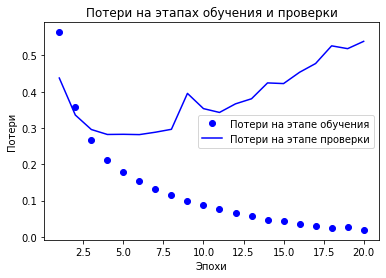

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Потери на этапе обучения")
plt.plot(epochs, val_loss_values, "b", label="Потери на этапе проверки")
plt.title("Потери на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Потери")
plt.legend()
plt.show()

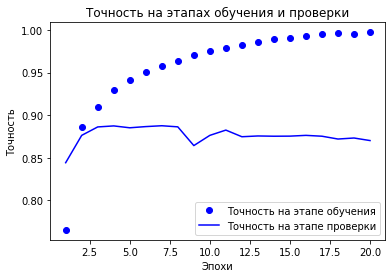

In [25]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Точность на этапе обучения")
plt.plot(epochs, val_acc, "b", label="Точность на этапе проверки")
plt.title("Точность на этапах обучения и проверки")
plt.xlabel("Эпохи")
plt.ylabel("Точность")
plt.legend()
plt.show()


In [2]:
model = keras.Sequential([
 layers.Dense(16, activation="relu"),
 layers.Dense(16, activation="relu"),
 layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
 loss="binary_crossentropy",
 metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

NameError: ignored

In [30]:
results

[0.3163479268550873, 0.8771600127220154]

In [28]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.20956498],
       [0.9999889 ],
       [0.7986064 ],
       ...,
       [0.14718328],
       [0.08538512],
       [0.5512423 ]], dtype=float32)